## Our experiment


In the first step we will see how fast our code performs and what the straightforward insertion of compiler directives (pragmas) can do.

In [1]:
import timeit

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%%bash
make clean

rm -f *.out weak.txt caching.txt caching2.txt out.txt 
rm -f -rf *~ *.o *.mod *.MOD *.i core.* *.out *.lst *.x *.x+orig *.x+[0-9]* *.dat *.report report_*.txt out.txt


In [3]:
%%bash
module load daint-gpu
module switch PrgEnv-gnu PrgEnv-cray
module load perftools-lite

make clean
make VERSION=modV04

rm -f *.out weak.txt caching.txt caching2.txt out.txt 
rm -f -rf *~ *.o *.mod *.MOD *.i core.* *.out *.lst *.x *.x+orig *.x+[0-9]* *.dat *.report report_*.txt out.txt
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -h omp -c m_utils.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -h omp -c stencil2d-modV04.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -h omp m_utils.o stencil2d-modV04.o -o stencil2d-modV04.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-modV04.x' (lite-samples) ...OK


cp stencil2d-modV04.x stencil2d.x


### nx = 120

In [6]:
%%bash
fname="OMP_nx120"
nthreads=1
threads="1 4 9 16"
echo "import numpy as np" >> $fname.py
for nthreads in $threads ; do
  echo "# n_threads = $nthreads" >> $fname.py
  echo "OMP_$nthreads = np.mean(np.array([" >> $fname.py
  for run in {1..10}; do
    echo "Using $nthreads threads, run num $run"
    export OMP_NUM_THREADS=$nthreads
    ncores=$nthreads
    srun -n 1 -c $ncores ./stencil2d-modV04.x+orig --nx 120 --ny 120 --nz 64 --num_iter 1024 >> $fname.py
  done
  sed -i '$ s/.$/]))/' $fname.py
done

Using 1 threads, run num 1
Using 1 threads, run num 2
Using 1 threads, run num 3
Using 1 threads, run num 4
Using 1 threads, run num 5
Using 1 threads, run num 6
Using 1 threads, run num 7
Using 1 threads, run num 8
Using 1 threads, run num 9
Using 1 threads, run num 10


srun: Job 48418221 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Step created for job 48418221


Using 4 threads, run num 1
Using 4 threads, run num 2
Using 4 threads, run num 3
Using 4 threads, run num 4
Using 4 threads, run num 5
Using 4 threads, run num 6


srun: Job 48418221 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Step created for job 48418221


Using 4 threads, run num 7


srun: Job 48418221 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Step created for job 48418221


Using 4 threads, run num 8
Using 4 threads, run num 9
Using 4 threads, run num 10
Using 9 threads, run num 1
Using 9 threads, run num 2
Using 9 threads, run num 3
Using 9 threads, run num 4


srun: Job 48418221 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Step created for job 48418221


Using 9 threads, run num 5
Using 9 threads, run num 6
Using 9 threads, run num 7
Using 9 threads, run num 8
Using 9 threads, run num 9
Using 9 threads, run num 10
Using 16 threads, run num 1
Using 16 threads, run num 2
Using 16 threads, run num 3
Using 16 threads, run num 4
Using 16 threads, run num 5
Using 16 threads, run num 6
Using 16 threads, run num 7
Using 16 threads, run num 8
Using 16 threads, run num 9
Using 16 threads, run num 10


### nx = 180

In [6]:
%%bash
fname="OMP_nx180"
nthreads=1
threads="1 4 9 16"
echo "import numpy as np" >> $fname.py
for nthreads in $threads ; do
  echo "# n_threads = $nthreads" >> $fname.py
  echo "OMP_$nthreads = np.mean(np.array([" >> $fname.py
  for run in {1..10}; do
    echo "Using $nthreads threads, run num $run"
    export OMP_NUM_THREADS=$nthreads
    ncores=$nthreads
    srun -n 1 -c $ncores ./stencil2d-modV04.x+orig --nx 180 --ny 180 --nz 64 --num_iter 1024 >> $fname.py
  done
  sed -i '$ s/.$/]))/' $fname.py
done

Using 1 threads, run num 1
Using 1 threads, run num 2
Using 1 threads, run num 3
Using 1 threads, run num 4
Using 1 threads, run num 5
Using 1 threads, run num 6
Using 1 threads, run num 7
Using 1 threads, run num 8
Using 1 threads, run num 9
Using 1 threads, run num 10


srun: Job 48418221 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Step created for job 48418221


Using 4 threads, run num 1
Using 4 threads, run num 2
Using 4 threads, run num 3
Using 4 threads, run num 4
Using 4 threads, run num 5
Using 4 threads, run num 6


srun: Job 48418221 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Step created for job 48418221


Using 4 threads, run num 7


srun: Job 48418221 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Step created for job 48418221


Using 4 threads, run num 8
Using 4 threads, run num 9
Using 4 threads, run num 10
Using 9 threads, run num 1
Using 9 threads, run num 2
Using 9 threads, run num 3
Using 9 threads, run num 4


srun: Job 48418221 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Step created for job 48418221


Using 9 threads, run num 5
Using 9 threads, run num 6
Using 9 threads, run num 7
Using 9 threads, run num 8
Using 9 threads, run num 9
Using 9 threads, run num 10
Using 16 threads, run num 1
Using 16 threads, run num 2
Using 16 threads, run num 3
Using 16 threads, run num 4
Using 16 threads, run num 5
Using 16 threads, run num 6
Using 16 threads, run num 7
Using 16 threads, run num 8
Using 16 threads, run num 9
Using 16 threads, run num 10


## Validation

As a first step, it is always good to make sure that the code is working correctly before proceeding with any sort of parallelization or optimization. We plot the initial and final step to see that the code still produces the same result.

In [7]:
def read_field_from_file(filename, num_halo=None):
    (rank, nbits, num_halo, nx, ny, nz) = np.fromfile(filename, dtype=np.int32, count=6)
    offset = (3 + rank) * 32 // nbits
    data = np.fromfile(
        filename,
        dtype=np.float32 if nbits == 32 else np.float64,
        count=nz * ny * nx + offset,
    )
    if rank == 3:
        return np.reshape(data[offset:], (nz, ny, nx))
    else:
        return np.reshape(data[offset:], (ny, nx))


def validate_results():
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    in_field = read_field_from_file("in_field.dat")
    im1 = axs[0].imshow(
        in_field[in_field.shape[0] // 2, :, :], origin="lower", vmin=-0.1, vmax=1.1
    )
    fig.colorbar(im1, ax=axs[0])
    axs[0].set_title("Initial condition")

    out_field = read_field_from_file("out_field.dat")
    im2 = axs[1].imshow(
        out_field[out_field.shape[0] // 2, :, :], origin="lower", vmin=-0.1, vmax=1.1
    )
    fig.colorbar(im2, ax=axs[1])
    axs[1].set_title("Final result")
    #plt.savefig("V03.png")
    plt.show()

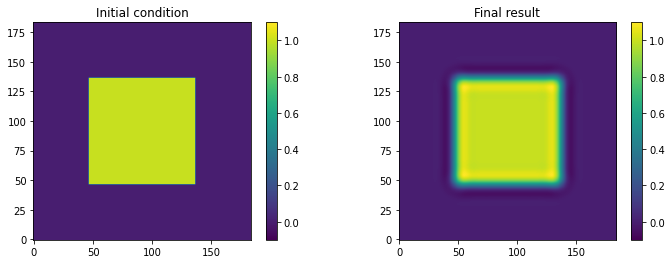

In [8]:
validate_results()